In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##  High-Entropy SEMCOR Entries

We first inspect the data and make visualizations, and then choose words based on criteria like number of senses, frequency, entropy, and PoS.

### EDA

In [10]:
df = pd.read_csv('../data/randscore_entropy.csv') #The CSV file contains data we have BERT embeddings for

In [11]:
df = df[(df['num_senses'] > 2) & (df['Principle Components'] == 2)]
#Exclude items with two senses

Counting number of types with each POS

In [12]:
get_pos = lambda l: l.split('.')[1]
df['pos'] = df['Lemma'].apply(get_pos)
df['pos'].value_counts()

v    105
n     48
r      6
a      3
s      2
Name: pos, dtype: int64

Looking at nouns and verbs

In [13]:
df = df[df['pos'].isin(['v', 'n'])]
df = df[['Lemma', 'entropy', 'num_senses', 'freq', 'pos']]

In [14]:
nouns = df[df['pos'] == 'n']
nouns

,Lemma,entropy,num_senses,freq,pos
0,thing.n,2.812869,8,264,n
20,life.n,2.040158,5,217,n
24,time.n,2.002842,5,505,n
28,trouble.n,1.973889,4,61,n
36,line.n,1.912234,5,100,n
44,death.n,1.894325,4,103,n
52,world.n,1.865668,4,202,n
54,force.n,1.861400,4,84,n
60,system.n,1.832076,4,98,n
64,history.n,1.798130,4,99,n


In [15]:
verbs = df[df['pos'] == 'v']
verbs

,Lemma,entropy,num_senses,freq,pos
2,meet.v,2.774648,9,214,v
4,lead.v,2.684982,7,170,v
6,serve.v,2.359147,6,194,v
8,give.v,2.268538,9,704,v
10,raise.v,2.234669,5,111,v
...,...,...,...,...,...
628,pay.v,0.913283,3,190,v
688,believe.v,0.889375,3,215,v
700,help.v,0.877312,3,226,v
768,expect.v,0.816499,3,234,v


We plot the number of types with 3-9 senses.

In [16]:
facet_pos = pd.concat([nouns, verbs])[['pos', 'num_senses']]
facet_pos['pos'] = facet_pos['pos'].replace({"n": "Noun", "v": "Verb"})
facet_pos.rename({"pos": "Part of Speech", "num_senses": "Number of Senses"}, axis = 1, inplace = True)


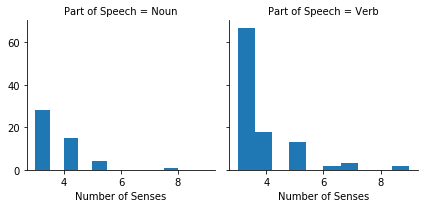

In [21]:
g = sns.FacetGrid(facet_pos, col="Part of Speech")
g = g.map(plt.hist, "Number of Senses")
plt.savefig("../../results/figures/nounverbfreq.png")

Plotting entropy vs frequency for nouns and verbs 

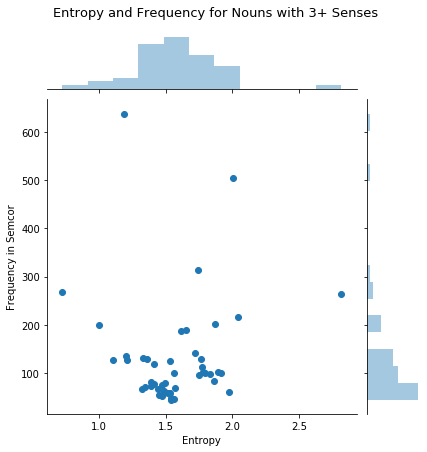

In [32]:
nounplot = sns.jointplot(x="entropy", y="freq", data=nouns)
nounplot.set_axis_labels('Entropy', 'Frequency in Semcor')
#plt.subplots_adjust(top=0.9, left = 0.2)
nounplot.fig.suptitle("Entropy and Frequency for Nouns with 3+ Senses", y=1.04, fontsize = 13)
nounplot.savefig("../../results/figures/nounentfreq.png")

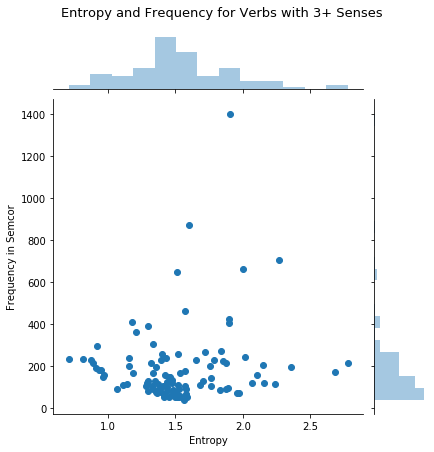

In [31]:
verbplot = sns.jointplot(x="entropy", y="freq", data=verbs)
verbplot.set_axis_labels('Entropy', 'Frequency in Semcor')
#plt.subplots_adjust(top=0.9, left = 0.2)
verbplot.fig.suptitle("Entropy and Frequency for Verbs with 3+ Senses", y=1.04, fontsize = 13)
verbplot.savefig("../../results/figures/verbentfreq.png")

These words were selected as experimentall stimuli by inspecting entropy, number of instances, and number of senses.

In [23]:
sel_words = ['life.n', 'lead.v', 'time.n', 'world.n', 'death.n', 'man.n', 'begin.v', 'cover.v', 'raise.v', 'drive.v',
    'ask.v', 'indicate.v', 'put.v', 'produce.v', 'consider.v', 'way.n', 'area.n', 'point.n', 'light.n', 'case.n']

In [24]:
df[df['Lemma'].isin(sel_words)]

,Lemma,entropy,num_senses,freq,pos
4,lead.v,2.684982,7,170,v
10,raise.v,2.234669,5,111,v
12,cover.v,2.159471,5,118,v
20,life.n,2.040158,5,217,n
24,time.n,2.002842,5,505,n
44,death.n,1.894325,4,103,n
52,world.n,1.865668,4,202,n
90,drive.v,1.683292,4,106,v
108,indicate.v,1.572229,3,177,v
178,produce.v,1.473220,3,130,v


In [304]:
df[df['Lemma'].isin(sel_words)].to_csv('../data/expt_semcor_types.csv')

Formatting for LaTeX

In [ ]:
expt_semcor_types = pd.read_csv('../data/expt_semcor_types.csv')
expt_semcor_types.drop("Unnamed: 0", axis = 1, inplace = True)
expt_semcor_types['pos'] = expt_semcor_types['pos'].replace({"n": "Noun", "v": "Verb"})
expt_semcor_types.rename({"entropy": "Entropy", "num_senses": "Number of Senses", "freq": "Frequency in Semcor",
                         "pos": "Part of Speech"}, axis = 1, inplace = True)
#expt_semcor_types.to_latex(index = False)
expt_semcor_types.to_csv("../../results/expt_semcor_types.csv", index = False)

## Words showing Polysemous Patterns (Srinivasan & Rabagliati, 2015)

We read in a dataframe of all the tagged senses in SEMCOR

In [190]:
tags = pd.read_csv('../data/semcor_tags.csv')

This function finds the number of instances for each sense of a type (specified by the word and pos arguments). We use it to look at types whose senses exhibit relationships in the paper.

In [192]:
def find_type_cnts(word, pos):
    df = tags[(tags['word'] == word) & (tags['pos'] == pos)]
    sense_freqs = df.groupby('sense').agg('count')
    return sense_freqs.drop(['word', 'pos'], axis = 1).rename({'lemma':'freq'}, axis = 1)

RepCont: book.n, 1 is the contents, 2 is physical object

In [52]:
find_type_cnts('book', 'n')

,freq
sense,
01,47
02,10
05,2


MatArt: glass.n, 1 is material, 2 is container

In [96]:
find_type_cnts('glass', 'n')

,freq
sense,
01,23
02,12
03,4


FigGrd: door.n: 1- "on the door", doorway.n.1- "through the door"

In [85]:
find_type_cnts('door', 'n')

,freq
sense,
00,1
01,131
03,4
2;1,1


This looks confusing so we'll call the pipeline

In [26]:
from core.semcor_bert_pipeline import SemCorSelector

In [27]:
sel = SemCorSelector()


In [28]:
sel.get_word_data('door', 'n')
_ = sel.get_selected_sense_sents(sel.get_senses_for_curr_word())

Senses for word door.n
Number of sentences for sense Synset('door.n.03') 4
Number of sentences for sense Synset('door.n.01') 97
Number of sentences for sense Synset('doorway.n.01') 34


BldPers- school.n 1. institution, 2. building 

In [128]:
find_type_cnts('school', 'n')

,freq
sense,
01,125
02,12
03,6
04,4
05,1


BdyObj: heart.n: 1- metaphorical, 2- organ, face.n: 1- body part, 3- appearance

In [146]:
find_type_cnts('face', 'n')

,freq
sense,
00,4
01,117
03,21
04,4
05,1
07,1
5;1,1


In [157]:
find_type_cnts('heart', 'n')

,freq
sense,
01,33
02,23
03,10


In [30]:
sel.get_word_data('heart', 'n')
_ = sel.get_selected_sense_sents(sel.get_senses_for_curr_word())

Senses for word heart.n
Number of sentences for sense Synset('center.n.01') 4
Number of sentences for sense Synset('heart.n.02') 23
Number of sentences for sense Synset('kernel.n.03') 2
Number of sentences for sense Synset('heart.n.01') 29
Number of sentences for sense Synset('heart.n.03') 8


## Finding Words with Homonymous Senses

We pick a set of words with homonymous senses for the shared trials in the experiment. These trials would be given to all participants. We decided on foot.n, table.n, plane.n, degree.n, right.n, and model.n

In [177]:
find_type_cnts('table', 'n')

,freq
sense,
01,52
02,25
03,4


In [182]:
find_type_cnts('plane', 'n')

,freq
sense,
01,21
02,16
03,2


In [32]:
sel.get_word_data('foot', 'n')
_ = sel.get_selected_sense_sents(sel.get_senses_for_curr_word())

Senses for word foot.n
Number of sentences for sense Synset('foot.n.01') 62
Number of sentences for sense Synset('foot.n.06') 1
Number of sentences for sense Synset('foot.n.03') 5
Number of sentences for sense Synset('foot.n.02') 79
Number of sentences for sense Synset('animal_foot.n.01') 4
Number of sentences for sense Synset('foundation.n.03') 1
Number of sentences for sense Synset('foot.n.07') 1


In [239]:
find_type_cnts('foot', 'n')

,freq
sense,
01,66
02,79
03,6
06,1
07,1


In [33]:
sel.get_word_data('degree', 'n')
_ = sel.get_selected_sense_sents(sel.get_senses_for_curr_word())

Senses for word degree.n
Number of sentences for sense Synset('degree.n.05') 6
Number of sentences for sense Synset('degree.n.06') 1
Number of sentences for sense Synset('academic_degree.n.01') 13
Number of sentences for sense Synset('degree.n.01') 23
Number of sentences for sense Synset('degree.n.04') 7
Number of sentences for sense Synset('degree.n.02') 17


In [34]:
sel.get_word_data('model', 'n')
_ = sel.get_selected_sense_sents(sel.get_senses_for_curr_word())

Senses for word model.n
Number of sentences for sense Synset('model.n.04') 4
Number of sentences for sense Synset('exemplar.n.01') 3
Number of sentences for sense Synset('model.n.07') 1
Number of sentences for sense Synset('model.n.03') 6
Number of sentences for sense Synset('model.n.01') 19
Number of sentences for sense Synset('model.n.02') 11
Number of sentences for sense Synset('model.n.06') 1


In [273]:
find_type_cnts('model', 'n')

,freq
sense,
01,22
02,11
03,6
04,4
06,1
07,1


In [275]:
find_type_cnts('right', 'n')

,freq
sense,
01,43
02,12
04,4
05,1
06,2
07,1


In [35]:
sel.get_word_data('bank', 'n')
_ = sel.get_selected_sense_sents(sel.get_senses_for_curr_word())

Senses for word bank.n
Number of sentences for sense Synset('depository_financial_institution.n.01') 20
Number of sentences for sense Synset('bank.n.04') 1
Number of sentences for sense Synset('bank.n.03') 2
Number of sentences for sense Synset('bank.n.01') 14


In [36]:
sel.get_word_data('right', 'n')
_ = sel.get_selected_sense_sents(sel.get_senses_for_curr_word())

Senses for word right.n
Number of sentences for sense Synset('right.n.05') 1
Number of sentences for sense Synset('right.n.01') 38
Number of sentences for sense Synset('right.n.02') 12
Number of sentences for sense Synset('right.n.07') 1
Number of sentences for sense Synset('right.n.04') 4
Number of sentences for sense Synset('right_field.n.01') 5
Number of sentences for sense Synset('right.n.06') 2


In [285]:
find_type_cnts('bass', 'n')

,freq
sense,
01,1
02,1
